# Data Normalization

### Load and clean the dataset

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = 'Sales data1.csv'
dataa = pd.read_csv(data)
print(dataa.head())

      Segment  Country     Product   Discount_Band    Units_Sold   \
0  Government   Canada   Carretera            None           1618   
1  Government  Germany   Carretera            None           1321   
2   Midmarket   France   Carretera            None           2178   
3   Midmarket  Germany   Carretera            None            888   
4   Midmarket   Mexico   Carretera            None           2470   

    Manufacturing_Price    Sale_Price    Gross_Sales   Discounts     Sales   \
0                      3            20          32370       $-        32370   
1                      3            20          26420       $-        26420   
2                      3            15          32670       $-        32670   
3                      3            15          13320       $-        13320   
4                      3            15          37050       $-        37050   

    COGS    Profit       Date  Month_Number  Month_Name   Year  
0   16185   16185.0  1/1/2014             1  

In [20]:
# Convert 'Date' column to datetime
dataa['Date'] = pd.to_datetime(dataa['Date'])

# # Add a Month column for seasonality analysis
dataa['Month'] = dataa['Date'].dt.month
dataa['Month_Name'] = dataa['Date'].dt.strftime('%B')

# # Preview cleaned data
# print(dataa.head())
print(dataa.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Segment                700 non-null    object        
 1   Country                700 non-null    object        
 2    Product               700 non-null    object        
 3    Discount_Band         700 non-null    object        
 4    Units_Sold            700 non-null    int64         
 5    Manufacturing_Price   700 non-null    int64         
 6    Sale_Price            700 non-null    int64         
 7    Gross_Sales           700 non-null    int64         
 8    Discounts             700 non-null    object        
 9     Sales                700 non-null    int64         
 10   COGS                  700 non-null    int64         
 11   Profit                695 non-null    float64       
 12  Date                   700 non-null    datetime64[ns]
 13  Month

### 1. Analyze sales and profit contributions by segment.

In [40]:
# print(dataa)
# Sales and profit by segment
segment_analysis = dataa.groupby('Segment').agg({
    '  Sales ': 'sum',
    ' Profit ': 'sum'
}).reset_index()

print(segment_analysis)

            Segment    Sales      Profit 
0  Channel Partners   1800594   1316803.0
1        Enterprise  19611685   -614555.0
2        Government  52504272  11388184.0
3         Midmarket   2381879    660099.0
4    Small Business  42427919   4143168.0


In [46]:
numeric = dataa.select_dtypes(include=['int64', 'float64']).columns
print(numeric)
text = dataa.select_dtypes(include= ['object']).columns
print(text)

Index([' Units_Sold ', ' Manufacturing_Price ', ' Sale_Price ',
       ' Gross_Sales ', '  Sales ', ' COGS ', ' Profit ', 'Month_Number',
       'Year'],
      dtype='object')
Index(['Segment', 'Country', ' Product ', ' Discount_Band ', ' Discounts ',
       ' Month_Name ', 'Month_Name'],
      dtype='object')


### 2.	Which countries generate the most revenue and have the highest sales volume?

                    Country    Sales    Units_Sold 
4  United States of America  25029830        232628
0                    Canada  24887652        247427
1                    France  24354179        240932
2                   Germany  23505342        201494
3                    Mexico  20949346        203325


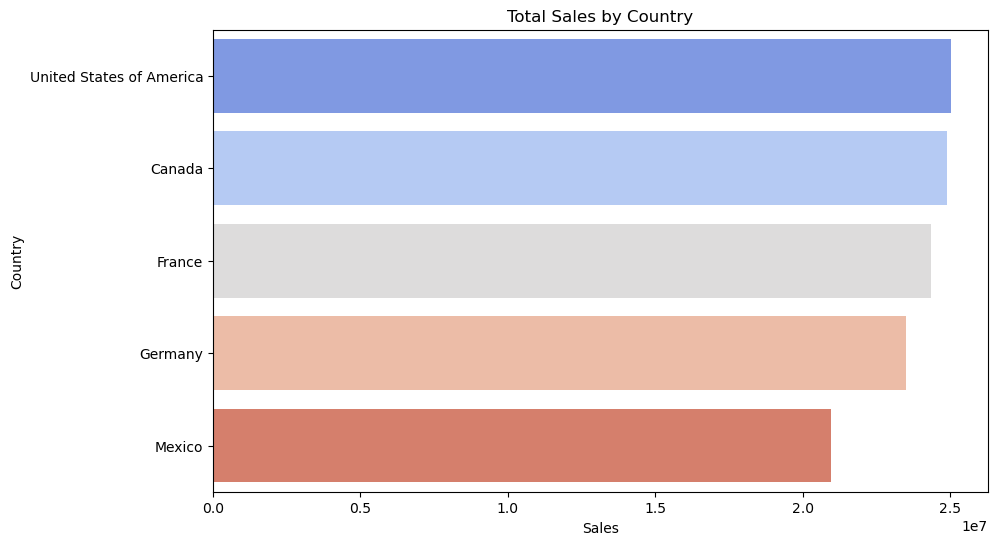

In [41]:
# Sales by country
country_analysis = dataa.groupby('Country').agg({
    '  Sales ': 'sum',
    ' Units_Sold ': 'sum'
}).reset_index().sort_values(by='  Sales ', ascending=False)

print(country_analysis)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=country_analysis, x='  Sales ', y='Country', palette='coolwarm')
plt.title('Total Sales by Country')
plt.xlabel('Sales')
plt.ylabel('Country')
plt.show()


### 3.	What are the top-performing products by sales and profit?

     Product     Sales     Profit 
3      Paseo   33011141  4797435.0
4        VTT   20511919  3034604.0
5       Velo   18250060  2305991.0
0   Amarilla   17747115  2814104.0
2    Montana   15390805  2114759.0


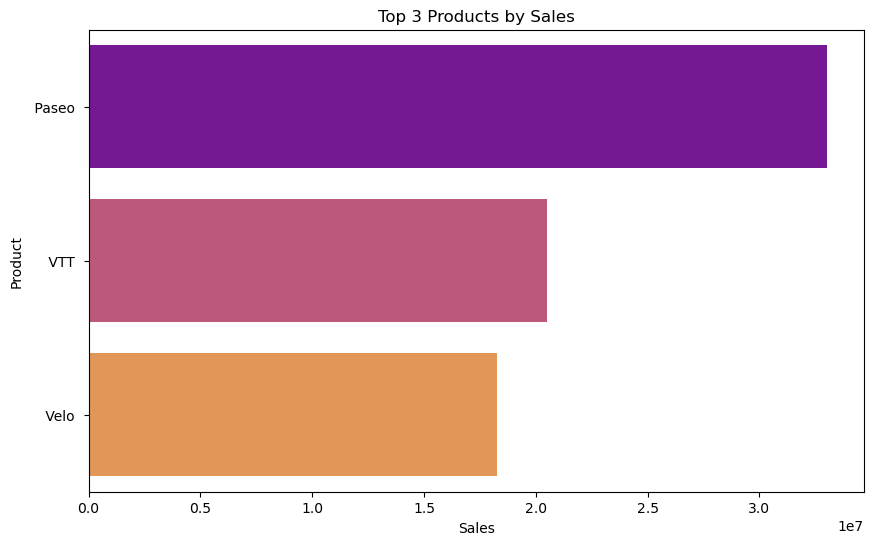

In [63]:
# Top products by sales and profit
product_analysis = dataa.groupby(' Product ').agg({
    '  Sales ': 'sum',
    ' Profit ': 'sum'
}).reset_index().sort_values(by='  Sales ', ascending=False)

print(product_analysis.head())

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=product_analysis.head(3), x='  Sales ', y=' Product ', palette='plasma')
plt.title('Top 3 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product')
plt.show()


### 4. How does the average order value (AOV) vary across segments and countries?

            Segment     Sales 
4    Small Business  424279.19
1        Enterprise  196116.85
2        Government  175014.24
3         Midmarket   23818.79
0  Channel Partners   18005.94



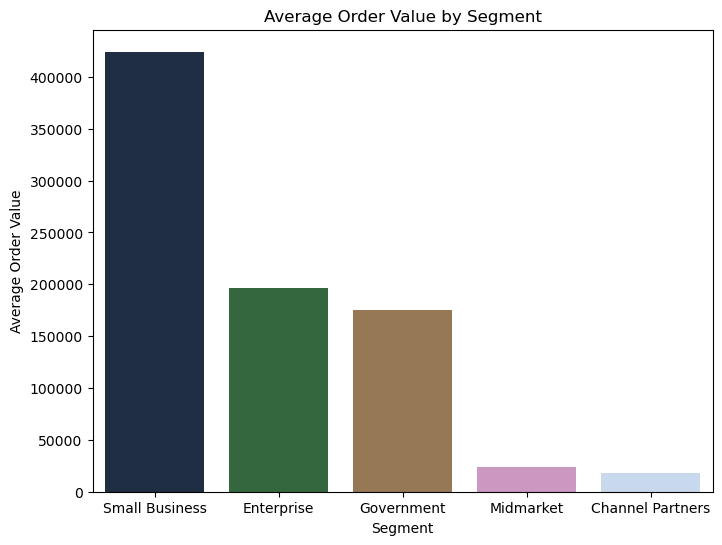

                    Country         Sales 
4  United States of America  178784.500000
0                    Canada  177768.942857
1                    France  173958.421429
2                   Germany  167895.300000
3                    Mexico  149638.185714


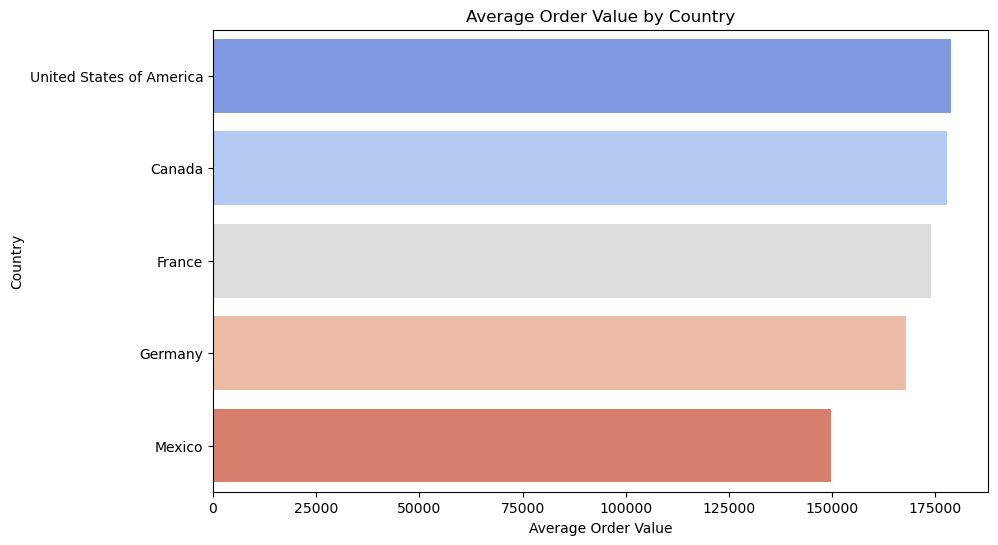

In [62]:
# AOV by segment
aov_segment = dataa.groupby('Segment').agg({
    '  Sales ': 'mean'
}).reset_index().sort_values(by='  Sales ', ascending=False)

print(aov_segment)
print('')
# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(data=aov_segment, x='Segment', y='  Sales ', palette='cubehelix')
plt.title('Average Order Value by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Order Value')
plt.show()

# AOV by country
aov_country = dataa.groupby('Country').agg({
   '  Sales ': 'mean'
}).reset_index().sort_values(by='  Sales ', ascending=False)
print(aov_country)
plt.figure(figsize=(10, 6))
sns.barplot(data=aov_country, x='  Sales ', y='Country', palette='coolwarm')
plt.title('Average Order Value by Country')
plt.xlabel('Average Order Value')
plt.ylabel('Country')
plt.show()
